In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data
df = data.sf_temps()
df = df.set_index('date')

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

### 2. Write the code necessary to visualize the minimum temperature over time.

### 3. Write the code necessary to visualize the maximum temperature over time.

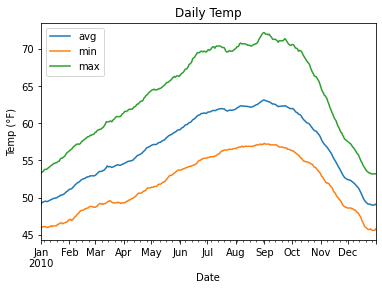

In [2]:
daily_max = df.resample('D').max().rename(columns={'temp':'max'})
daily_avg = df.resample('D').mean().rename(columns={'temp':'avg'})
daily_min = df.resample('D').min().rename(columns={'temp':'min'})
daily = daily_avg.join([daily_min, daily_max])
daily.plot()
plt.title('Daily Temp')
plt.ylabel('Temp (°F)')
plt.xlabel('Date')
plt.show()

### 4. Which month is the coldest, on average?

### 5. Which month has the highest average temperature?

In [3]:
monthly_avg = df.resample('M').mean().reset_index()
coldest = monthly_avg[monthly_avg.temp == monthly_avg.temp.min()].date
hottest = monthly_avg[monthly_avg.temp == monthly_avg.temp.max()].date
print('Coldest Month:', coldest.dt.month_name().iloc[0])
print('Hottest Month:', hottest.dt.month_name().iloc[0])

Coldest Month: January
Hottest Month: September


### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [251]:
dmm = df.resample('D').agg(['min', 'max'])
dmm['delta'] = dmm.temp['max'] - dmm.temp['min']
dmm = dmm.resample('M').delta.mean()
hvar = dmm[dmm == dmm.max()].index.strftime('%B')[0]
print('Highest temp variability:', hvar)

Highest temp variability: September


### 7. __Bonus__: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

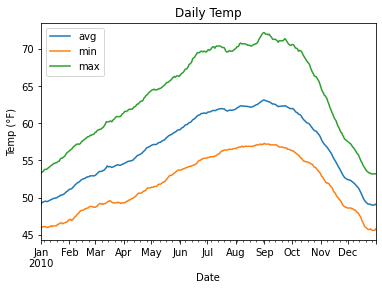

In [5]:
daily = daily_avg.join([daily_min, daily_max])
daily.plot()
plt.title('Daily Temp')
plt.ylabel('Temp (°F)')
plt.xlabel('Date')
plt.show()

<h1><center> New weather dataset</center></h1>

In [6]:
s = data.seattle_weather().set_index('date')
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [7]:
s.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [8]:
# Precipitation sum
ps = s.resample('M').sum()
# highest precipitation date
hpd = (ps[ps.precipitation == ps.precipitation.max()]).reset_index().date.iloc[0]
print('Highest amount of precipitation:', hpd.strftime(("%B, %Y")))

Highest amount of precipitation: December, 2015


### 2. Visualize the amount of monthly precipitation over time.

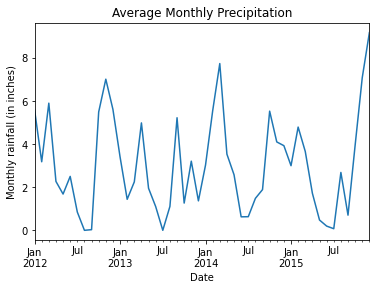

In [9]:
# Average monthly precipitation over time 
aps = s.resample('M').mean()
aps.precipitation.plot()
plt.ylabel('Monthly rainfall (in inches)')
plt.xlabel('Date')
plt.title('Average Monthly Precipitation')
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


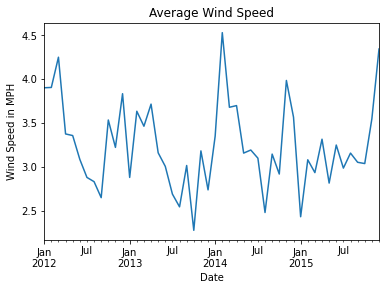

In [10]:
wdf = s.resample('M').mean()
wdf.wind.plot()
plt.xlabel('Date')
plt.ylabel('Wind Speed in MPH')
plt.title('Average Wind Speed')
plt.show()

### 4. Which year-month combination is the windiest?

In [11]:
# Wind sum
ws = s.resample('M').sum()
# highest wind date
windy = (ws[ws.wind == ws.wind.max()]).reset_index().date.iloc[0]
print('Windiest Month:', windy.strftime(("%B, %Y")))

Windiest Month: December, 2015


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [12]:
def sum_sun(grp):
    return np.sum(grp=='sun')
weather = s.resample('Y').agg({'weather': sum_sun}).rename(columns={'weather':'sun_count'})
weather.sun_count.max()

sunniest_year = (weather[weather.sun_count == weather.sun_count.max()]).reset_index().date.iloc[0].strftime('%Y')
print('The sunniest year is:', sunniest_year)

The sunniest year is: 2014


### 6. In which month does it rain the most?

In [13]:
month = s.resample('M').sum()
most_rain = month.sort_values(by='precipitation').tail(1).reset_index().iloc[0].date
print(most_rain.strftime('%B'))

December


### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [14]:
def norain(grp):
    return np.sum(grp!=0)
weather = s.resample('M').agg({'precipitation': norain}).rename(columns={'precipitation':'rainy_days'})
rainy_days = weather.rainy_days.sort_values().tail(1).reset_index().date.iloc[0].strftime('%B')
print(rainy_days)

December


<h1><center>New Data</center></h1>

In [15]:
f = data.flights_20k()
f = f.set_index('date')
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


In [16]:
f.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


### 1. Convert any negative delays to 0

In [17]:
def is_delayed(x):
    if x > 0:
        return x
    else:
        return 0

f.delay = f.delay.apply(lambda x: is_delayed(x))

### 2. Which hour of the day has the highest average delay

In [18]:
hourly = f.resample('H').mean().reset_index()
hourly = hourly.fillna(0)
hourly.date = hourly.date.apply(lambda x: x.strftime('%H'))
hourly = hourly.groupby('date').mean()
hourly = hourly.reset_index().rename(columns={'date':'hour'})
highest_delay = hourly[hourly.delay == hourly.delay.max()].hour.iloc[0]
print('The time of day with the highest delay is:', highest_delay)

The time of day with the highest delay is: 22


### 3. Does the day of the week make a difference in the delay amount?

* It appears that the day of the week does make a difference in the delay.

In [19]:
hourly = f.resample('H').mean().reset_index()
hourly = hourly.fillna(0)
hourly['day_of_week'] = hourly.date.apply(lambda x: x.strftime('%A'))
dow = hourly.groupby('day_of_week').mean()
dow

,delay,distance
day_of_week,,
Friday,17.344855,370.809138
Monday,6.251825,366.958384
Saturday,7.011741,371.838233
Sunday,8.746833,364.835882
Thursday,11.745785,358.626695
Tuesday,8.591634,360.867082
Wednesday,11.093647,372.189020


### 4. Does the month make a difference in the delay amount?

* It appears that the month also makes a difference in the delay amount

In [20]:
hourly = f.resample('H').mean().reset_index()
hourly = hourly.fillna(0)
hourly['month'] = hourly.date.apply(lambda x: x.strftime('%B'))
dow = hourly.groupby('month').mean()
dow

,delay,distance
month,,
February,12.082455,372.335406
January,9.916790,361.423767
March,8.576662,366.607022


<h1><center>New Data</h1></center>

In [25]:
ie = data.iowa_electricity()
print(ie.info())
ie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB
None


,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


### 1. For each row, calculate the percentage of the year's total that energy source provided.

In [26]:
total_gen = ie.groupby('year').sum().to_dict()['net_generation']
ie['total_gen'] = ie.year
ie = ie.replace({'total_gen': total_gen})
ie['pct_total'] = (ie.net_generation / ie.total_gen)*100
ie = ie.set_index('year')
ie.head()


,source,net_generation,total_gen,pct_total
year,,,,
2001-01-01,Fossil Fuels,35361,40651,86.986790
2002-01-01,Fossil Fuels,35991,42528,84.628950
2003-01-01,Fossil Fuels,36234,42107,86.052200
2004-01-01,Fossil Fuels,36205,43236,83.738089
2005-01-01,Fossil Fuels,36883,44145,83.549666


### 2. Lineplot of generation over time, color by source

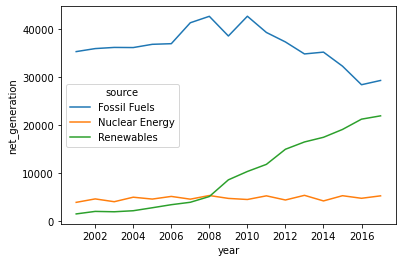

In [29]:
tmp = ie.reset_index()
sns.lineplot(x=tmp.year, y=tmp.net_generation, hue=tmp.source)
plt.show()

### 3. Display the data as table where years are columns, and energy source is rows (Hint: `df.pivot_table`)

In [37]:
ie.pivot_table(index='source', columns='year')

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       ...  \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01  ...   
source                                                                 ...   
Fossil Fuels        37014      41389      42734      38620      42750  ...   
Nuclear Energy       5095       4519       5282       4679       4451  ...   
Renewables           3364       3870       5070       8560      10308  ...   

                total_gen                                              \
year           2008-01-01 2009-01-01 2010-01-01 2011-01-01 2012-01-01   
source                                                                  
Fossil Fuels        53086      51859      57509      56371      56675   
Nuclear Energy      53086      51859      57509      56371      56675   
Renewables          53086      51859      57509      56371      56675   

                                                                       
year           2013-01-01 2014-01-01 2015-01-01 2016-01-01 2017-01-01  
source                                                                 
Fossil Fuels        56670      56854      56653      54381      56476  
Nuclear Energy      56670      56854      56653      54381      56476  
Renewables          56670      56854      56653      54381      56476  

[3 rows x 51 columns]

### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

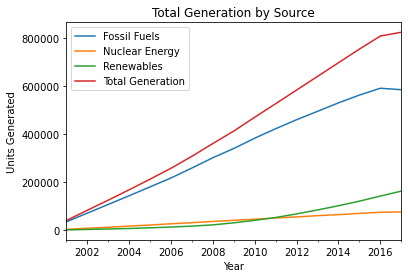

In [93]:
sources = ie.source.unique()
column_names = {n:col for n,col in enumerate(sources)}
source_list = list()

for source in sources:
    val = ie[ie['source'] == source].net_generation.rolling(16, min_periods=0).sum().to_dict()
    source_list.append(val)

cie = pd.DataFrame(source_list).T
cie = cie.rename(columns=column_names)
cie['Total Generation'] = cie.sum(axis=1)
cie.plot()
plt.title('Total Generation by Source')
plt.ylabel('Units Generated')
plt.xlabel('Year')
plt.show()

### 5. Is the total generation increasing over time?

> - Yes total generation is increasing over time.

* How would you control for increasing consumption over time when considering how much energy is coming from each source?

> - By trying to estimate the demand over time and parry it with each source production as a percentage.

* Express each number as a % of the year's total

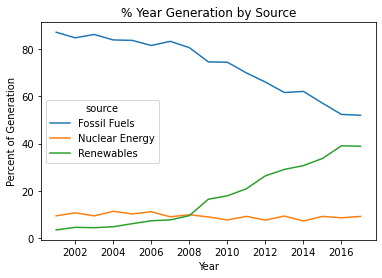

In [139]:
tmp = ie.reset_index()
sns.lineplot(x=tmp.year, y=tmp.pct_total, hue=tmp.source)
plt.title('% Year Generation by Source')
plt.ylabel('Percent of Generation')
plt.xlabel('Year')
plt.show()

### 1. Use the `sf_temps` dataset

### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
| month     |   cold |   cool |   warm |   hot |
|:----------|-------:|-------:|-------:|------:|
| January   |     31 |      0 |      0 |     0 |
| February  |     25 |      3 |      0 |     0 |
| March     |      0 |     31 |      0 |     0 |
| April     |      0 |     30 |      0 |     0 |
| May       |      0 |      6 |     25 |     0 |
| June      |      0 |      0 |     30 |     0 |
| July      |      0 |      0 |      5 |    26 |
| August    |      0 |      0 |      0 |    31 |
| September |      0 |      0 |      0 |    30 |
| October   |      0 |      0 |     27 |     4 |
| November  |      5 |     21 |      4 |     0 |
| December  |     31 |      0 |      0 |     0 |

### 4. Create pretty labels for time plots


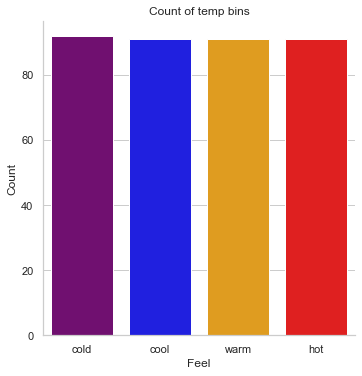

In [234]:
# Reduces to daily mean temp
days = df.resample('D').mean()

# Splits the data into bins of temp feeling
days['feels'] = pd.qcut(days.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])


# Puts month names as a column from the index
days = days.reset_index()
days['month'] = days.date.apply(lambda x: x.strftime('%B'))

# Creates columns for each temp feeling using booleans
for label in ['cold', 'cool', 'warm', 'hot']:
    days[label] = days.feels == label
    
# Groups by month and sums each feel column
feels = days.groupby('month').agg({'cold': 'sum', 'cool': 'sum',
                          'warm': 'sum', 'hot': 'sum'})

# Ensures months are in the proper chronological order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
feels = feels.reindex(new_order, axis=0)

# Tallies count of each temp_bin
feels_count = days.groupby('feels').agg({'feels': 'count'}).rename(columns={'feels': 'count'})
feels_count = feels_count.reset_index()

sns.set(style='whitegrid')
sns.catplot(x='feels', y='count', data=feels_count, kind='bar', palette={'cold': 'purple', 'cool': 'blue', 'warm': 'orange', 'hot': 'red'})
plt.title('Count of temp bins')
plt.xlabel('Feel')
plt.ylabel('Count')
plt.show()

### 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

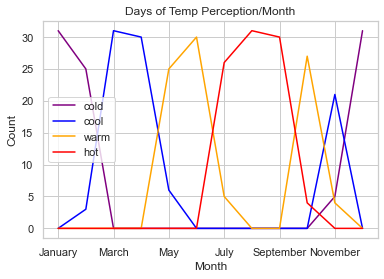

In [232]:
# Plots the DataFrame and defines the colors to their respective feeling
sns.set(style='whitegrid')
feels.plot(color={'cold': 'purple', 'cool': 'blue', 'warm': 'orange', 'hot': 'red'})
plt.title('Days of Temp Perception/Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()